In [1]:
import pandas as pd

# path to metrics files
data_path = './data/cast2019/'

# QA metrics

In [2]:
# load query_metrics file, which is generated from a trec run file using:
# `grep '^map\s\|recip_rank\|^P_1\|^P_3\|ndcg_cut_1\|ndcg_cut_3\|ndcg_cut_5' original.run | grep -v "all" > original_query_metrics.txt`
implicit_df = pd.read_csv(data_path + 'original_query_metrics.txt', delimiter='\t', header=None)
qr_df = pd.read_csv(data_path + 'Transformer_Plus_Plus_Q_query_metrics.txt', delimiter='\t', header=None)  # official_rewrite_query_metrics quretec_qna_query_metrics
human_df = pd.read_csv(data_path + 'human_query_metrics.txt', delimiter='\t', header=None)
human_df.tail()

,0,1,2
1213,P_1,all,0.7052
1214,P_3,all,0.6146
1215,ndcg_cut_1,all,0.6118
1216,ndcg_cut_3,all,0.5925
1217,ndcg_cut_5,all,0.5921


In [3]:
# filter out metric
metric = 'ndcg_cut_3'
implicit_df = implicit_df[implicit_df[0].str.contains(metric)]
qr_df = qr_df[qr_df[0].str.contains(metric)]
human_df = human_df[human_df[0].str.contains(metric)]
human_df.head()

,0,1,2
5,ndcg_cut_3,31_1,1.0000
12,ndcg_cut_3,31_2,0.8827
19,ndcg_cut_3,31_3,0.7654
26,ndcg_cut_3,31_4,1.0000
33,ndcg_cut_3,31_5,0.5000


In [4]:
# create a table to compare results for different rewrites
turn_breakdown_df = pd.DataFrame({
    'turn': implicit_df[1],
    'implicit': implicit_df[2],
    'qr': qr_df[2],
    'human': human_df[2]
})
turn_breakdown_df.head()

,turn,implicit,qr,human
5,31_1,1.0000,1.0000,1.0000
12,31_2,0.0000,0.8827,0.8827
19,31_3,0.7654,0.7654,0.7654
26,31_4,0.0000,1.0000,1.0000
33,31_5,0.0000,0.5000,0.5000


# Error analysis

In [5]:
# NDCG@3 > 0 column
print(turn_breakdown_df[~(turn_breakdown_df.implicit > 0) & ~(turn_breakdown_df.qr > 0) & ~(turn_breakdown_df.human > 0)].shape[0]) # 000
print(turn_breakdown_df[(turn_breakdown_df.implicit > 0) & ~(turn_breakdown_df.qr > 0) & ~(turn_breakdown_df.human > 0)].shape[0]) # 100
print(turn_breakdown_df[~(turn_breakdown_df.implicit > 0) & (turn_breakdown_df.qr > 0) & ~(turn_breakdown_df.human > 0)].shape[0]) # 010
print(turn_breakdown_df[(turn_breakdown_df.implicit > 0) & (turn_breakdown_df.qr > 0) & ~(turn_breakdown_df.human > 0)].shape[0]) # 110 
print(turn_breakdown_df[~(turn_breakdown_df.implicit > 0) & ~(turn_breakdown_df.qr > 0) & (turn_breakdown_df.human > 0)].shape[0]) # 001
print(turn_breakdown_df[(turn_breakdown_df.implicit > 0) & ~(turn_breakdown_df.qr > 0) & (turn_breakdown_df.human > 0)].shape[0]) # 101
print(turn_breakdown_df[~(turn_breakdown_df.implicit > 0) & (turn_breakdown_df.qr > 0) & (turn_breakdown_df.human > 0)].shape[0]) # 011
print(turn_breakdown_df[(turn_breakdown_df.implicit > 0) & (turn_breakdown_df.qr > 0) & (turn_breakdown_df.human > 0)].shape[0])  # 111

10
0
0
1
10
1
63
89


In [6]:
# NDCG@3 > 0.5 column
print(turn_breakdown_df[~(turn_breakdown_df.implicit >= 0.5) & ~(turn_breakdown_df.qr >= 0.5) & ~(turn_breakdown_df.human >= 0.5)].shape[0]) # 000
print(turn_breakdown_df[(turn_breakdown_df.implicit >= 0.5) & ~(turn_breakdown_df.qr >= 0.5) & ~(turn_breakdown_df.human >= 0.5)].shape[0]) # 100
print(turn_breakdown_df[~(turn_breakdown_df.implicit >= 0.5) & (turn_breakdown_df.qr >= 0.5) & ~(turn_breakdown_df.human >= 0.5)].shape[0]) # 010
print(turn_breakdown_df[(turn_breakdown_df.implicit >= 0.5) & (turn_breakdown_df.qr >= 0.5) & ~(turn_breakdown_df.human >= 0.5)].shape[0]) # 110 
print(turn_breakdown_df[~(turn_breakdown_df.implicit >= 0.5) & ~(turn_breakdown_df.qr >= 0.5) & (turn_breakdown_df.human >= 0.5)].shape[0]) # 001
print(turn_breakdown_df[(turn_breakdown_df.implicit >= 0.5) & ~(turn_breakdown_df.qr >= 0.5) & (turn_breakdown_df.human >= 0.5)].shape[0]) # 101
print(turn_breakdown_df[~(turn_breakdown_df.implicit >= 0.5) & (turn_breakdown_df.qr >= 0.5) & (turn_breakdown_df.human >= 0.5)].shape[0]) # 011
print(turn_breakdown_df[(turn_breakdown_df.implicit >= 0.5) & (turn_breakdown_df.qr >= 0.5) & (turn_breakdown_df.human >= 0.5)].shape[0])  # 111

55
0
1
1
25
0
48
44


In [7]:
# NDCG@3 = 1 column
print(turn_breakdown_df[~(turn_breakdown_df.implicit == 1) & ~(turn_breakdown_df.qr == 1) & ~(turn_breakdown_df.human == 1)].shape[0]) # 000
print(turn_breakdown_df[(turn_breakdown_df.implicit == 1) & ~(turn_breakdown_df.qr == 1) & ~(turn_breakdown_df.human == 1)].shape[0]) # 100
print(turn_breakdown_df[~(turn_breakdown_df.implicit == 1) & (turn_breakdown_df.qr == 1) & ~(turn_breakdown_df.human == 1)].shape[0]) # 010
print(turn_breakdown_df[(turn_breakdown_df.implicit == 1) & (turn_breakdown_df.qr == 1) & ~(turn_breakdown_df.human == 1)].shape[0]) # 110 
print(turn_breakdown_df[~(turn_breakdown_df.implicit == 1) & ~(turn_breakdown_df.qr == 1) & (turn_breakdown_df.human == 1)].shape[0]) # 001
print(turn_breakdown_df[(turn_breakdown_df.implicit == 1) & ~(turn_breakdown_df.qr == 1) & (turn_breakdown_df.human == 1)].shape[0]) # 101
print(turn_breakdown_df[~(turn_breakdown_df.implicit == 1) & (turn_breakdown_df.qr == 1) & (turn_breakdown_df.human == 1)].shape[0]) # 011
print(turn_breakdown_df[(turn_breakdown_df.implicit == 1) & (turn_breakdown_df.qr == 1) & (turn_breakdown_df.human == 1)].shape[0])  # 111

155
0
0
0
4
0
11
4


# Error Plot

In [8]:
from collections import defaultdict
import numpy as np

union_keys = list(turn_breakdown_df['turn'])
implicit_scores = {row[0]: {metric: row[1]} for row in turn_breakdown_df.values}
gen_scores = {row[0]: {metric: row[2]} for row in turn_breakdown_df.values}
human_scores = {row[0]: {metric: row[3]} for row in turn_breakdown_df.values}

vals = defaultdict(lambda: defaultdict(int))
thresholds = [0.0001] + list(np.arange(0.02, 1.02, 0.02))
thresholds = [round(t, 6) for t in thresholds]
for k in union_keys:
    for t in thresholds:
        gen_val = int(gen_scores[k][metric] >= t)
        hum_val = int(human_scores[k][metric] >= t)
        imp_val = int(implicit_scores[k][metric] >= t)
        vals[f"Original ({imp_val}) | QR ({gen_val}) | Human ({hum_val})"][t] += 1
print(vals)
# 100 missing
print(len(vals))

source = defaultdict(list)
thresholds = [0.0001] + list(np.arange(0.02, 1.02, 0.02))
thresholds = [round(t, 6) for t in thresholds]
thresholds.reverse()
print(thresholds)
for val_key, threshold_map in vals.items():
    for t in thresholds:
        freq = threshold_map[t]
        source["Score Card"].append(str(val_key))
        source["NDCG@3 Threshold"].append(t)
        source["Percentage of Test Set"].append(freq)
retrieval_qa_source = pd.DataFrame(source)

defaultdict(<function <lambda> at 0x11c439840>, {'Original (1) | QR (1) | Human (1)': defaultdict(<class 'int'>, {0.0001: 89, 0.02: 89, 0.04: 89, 0.06: 88, 0.08: 83, 0.1: 83, 0.12: 81, 0.14: 81, 0.16: 78, 0.18: 77, 0.2: 76, 0.22: 75, 0.24: 72, 0.26: 71, 0.28: 70, 0.3: 66, 0.32: 65, 0.34: 63, 0.36: 61, 0.38: 59, 0.4: 56, 0.42: 52, 0.44: 51, 0.46: 48, 0.48: 45, 0.5: 44, 0.52: 43, 0.54: 41, 0.56: 38, 0.58: 33, 0.6: 32, 0.62: 27, 0.64: 27, 0.66: 23, 0.68: 22, 0.7: 22, 0.72: 20, 0.74: 18, 0.76: 17, 0.78: 15, 0.8: 15, 0.82: 14, 0.84: 12, 0.86: 12, 0.88: 10, 0.9: 8, 0.92: 8, 0.94: 4, 0.96: 4, 0.98: 4, 1.0: 4}), 'Original (0) | QR (1) | Human (1)': defaultdict(<class 'int'>, {0.0001: 63, 0.02: 63, 0.04: 63, 0.06: 64, 0.08: 65, 0.1: 65, 0.12: 63, 0.14: 63, 0.16: 63, 0.18: 63, 0.2: 64, 0.22: 63, 0.24: 59, 0.26: 59, 0.28: 59, 0.3: 58, 0.32: 58, 0.34: 56, 0.36: 55, 0.38: 53, 0.4: 52, 0.42: 52, 0.44: 52, 0.46: 52, 0.48: 51, 0.5: 48, 0.52: 46, 0.54: 45, 0.56: 47, 0.58: 47, 0.6: 45, 0.62: 43, 0.64: 3

In [9]:
import altair as alt

error_chart = alt.Chart(retrieval_qa_source).mark_area().encode(
    x="NDCG@3 Threshold:Q",
    y=alt.Y("Percentage of Test Set:Q", stack="normalize"),
    color="Score Card:N")

error_chart

alt.Chart(...)

# QR

In [10]:
# load rewrites
qr_df = pd.read_csv(data_path + 'Transformer_Plus_Plus_Q.tsv', delimiter='\t')  # OfficialBaseline QuReTeC_QnA
human_df = pd.read_csv(data_path + 'Human.tsv', delimiter='\t')
qr_df['human'] = human_df['query']
qr_df.head()

,conversation_id,turn_id,id,query,original,human
0,31,1,31_1,What is throat cancer?,What is throat cancer?,What is throat cancer?
1,31,2,31_2,Is throat cancer treatable,Is it treatable?,Is throat cancer treatable?
2,31,3,31_3,Tell me about lung cancer,Tell me about lung cancer.,Tell me about lung cancer.
3,31,4,31_4,What are lung cancer symptoms,What are its symptoms?,What are lung cancer's symptoms?
4,31,5,31_5,Can lung cancer spread to the throat cancer,Can it spread to the throat?,Can lung cancer spread to the throat?


# Sampling

In [11]:
# show samples with QR errors
qr_errors = turn_breakdown_df[~(turn_breakdown_df.implicit == 1) & ~(turn_breakdown_df.qr == 1) & (turn_breakdown_df.human == 1)]
qr_errors = turn_breakdown_df[~(turn_breakdown_df.implicit > 0) & ~(turn_breakdown_df.qr > 0) & (turn_breakdown_df.human > 0)]
print(qr_errors) # 001

      turn  implicit   qr   human
131   32_8       0.0  0.0  0.5701
138   32_9       0.0  0.0  0.5307
250   34_8       0.0  0.0  1.0000
285   37_5       0.0  0.0  0.1327
306   37_8       0.0  0.0  0.6900
516   54_6       0.0  0.0  0.6806
593   56_8       0.0  0.0  0.7500
621   58_4       0.0  0.0  0.5433
1118  78_4       0.0  0.0  0.2882
1174  79_4       0.0  0.0  0.7067


In [12]:
error_samples = pd.merge(qr_errors, qr_df, how='left', left_on='turn', right_on='id')
error_samples

,turn,implicit,qr,human_x,conversation_id,turn_id,id,query,original,human_y
0,32_8,0.0,0.0,0.5701,32,8,32_8,What are makos adaptations,What are their adaptations?,What are Mako shark adaptations?
1,32_9,0.0,0.0,0.5307,32,9,32_9,Where do makos live,Where do they live?,Where do Mako sharks live?
2,34_8,0.0,0.0,1.0000,34,8,34_8,What empires survived during breakdown of trade,What empires survived?,What empires survived the Bronze Age collapse?
3,37_5,0.0,0.0,0.1327,37,5,37_5,What are other similar experiments,What are other similar experiments?,What are other similar experiments to the Stan...
4,37_8,0.0,0.0,0.6900,37,8,37_8,What were the similarities and differences bet...,What were the similarities and differences bet...,What were the similarities and differences bet...
5,54_6,0.0,0.0,0.6806,54,6,54_6,What is the best time to visit the reflecting ...,What is the best time to visit the reflecting ...,What is the best time to visit the reflecting ...
6,56_8,0.0,0.0,0.7500,56,8,56_8,What is the relationship to speciation,What is the relationship to speciation?,What is the relationship of Darwin's theory to...
7,58_4,0.0,0.0,0.5433,58,4,58_4,What are examples of important ones,What are examples of important ones?,What are examples of important real-time datab...
8,78_4,0.0,0.0,0.2882,78,4,78_4,What is paleo,What is paleo?,What is paleo diet?
9,79_4,0.0,0.0,0.7067,79,4,79_4,What is Herbert Spencer known for,What is Herbert Spencer known for?,What is Herbert Spencer known for in sociology?


# Question/Answer similarities
## Passage retrieval

In [13]:
# error_samples = pd.merge(qr_df, qr_df, how='left', left_on='id', right_on='turn')

In [17]:
# calculate ROUGE between model and human QRs
from rouge_score import rouge_scorer

# load rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# produce ROUGE1-R metrics for each pair of QRs
rouge = []
for index, row in qr_df.iterrows():
    human_rewrite, qr_rewrite = row['human'], row['query']
    scores = scorer.score(human_rewrite, qr_rewrite)
    rouge.append(scores['rouge1'].fmeasure)
qr_df['rouge'] = rouge
qr_df.head()

,conversation_id,turn_id,id,query,original,human,rouge
0,31,1,31_1,What is throat cancer?,What is throat cancer?,What is throat cancer?,1.000000
1,31,2,31_2,Is throat cancer treatable,Is it treatable?,Is throat cancer treatable?,1.000000
2,31,3,31_3,Tell me about lung cancer,Tell me about lung cancer.,Tell me about lung cancer.,1.000000
3,31,4,31_4,What are lung cancer symptoms,What are its symptoms?,What are lung cancer's symptoms?,0.909091
4,31,5,31_5,Can lung cancer spread to the throat cancer,Can it spread to the throat?,Can lung cancer spread to the throat?,0.933333


In [18]:
# add recall values
r_1000 = '1 1 1 1 0.869 1 1 1 0.316 1 0.618 1 0.562 0.536 1 0.294 0.497 0.26 0.431 0.116 1 1 1 1 0.635 1 1 1 0.467 1 1 1 1 0.051 1 0.152 0.232 0.064064064064064 0 1 1 1 1 1 0.317 0.243 0.708 0.069 1 1 1 1 1 0.98 0.199 0.33 1 1 0.858 1 1 1 1 0.561 1 1 0.047 1 1 0.045 1 1 1 1 1 1 0.033 1 1 1 0.721 1 1 0.519 0.674 0.028 0.04 0.061 1 1 1 0.552 0.259 1 1 1 1 1 1 0.306 1 1 1 0.643 1 0.452 0.009 1 1 0.704 0.363 0.578 0.446 0.663 1 1 0.787 0.749 0.604 0.142 0.008 0.032 0.291 1 0.942 0.949 1 0.012 0.969 0.582 0.94 1 0.6 0.062 1 0.311 1 1 1 1 1 1 0.258 1 1 1 0.046 0.4004004004004 1 1 1 1 1 0.715 1 1 1 1 1 1 0.064 0.223 0.082 1 1 1 1 1 1 0.523 1 1 1 1 1 1 1 0.276 0.182 1 1 1 1 1 1 1 1 1 1 1 1 1 0.151 0.734 1 1 1 1 1 1 0.703 1 0.271 0.577 0.924 1 1 1 1 1 1 1 1 1 1 0.271 1 0.048 0.02 0.157 1 1 1 1 1 1 1 0.098 0.091 1 1 1 1 1 1 1 1 1 1 1 0.115 1 1 1 1 1 1 0.877 1 1 0.275 1 0.361 0.516 0.063 1 0.167 1 1 1 1 1 1 1 1 0.262 0.526 1 1 1 1 1 0.191 1 1 1 1 0.753 1 1 0.18 1 0 1 1 1 0.453 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0.089 0.148 0.088 0.282 0.002 0.16 0.138 0.079 0.13 0.247 1 1 0.578 1 1 1 1 1 1 1 1 1 1 1 0.408 0.421 0.11 0.744 0.182 1 1 1 0.535 1 1 1 1 1 1 1 1 0.002 0.783 1 1 1 1 0.329 0.1 1 0.773 1 1 1 1 1 1 1 1 1 0.334 1 1 1 0.823 1 1 0.429 0.344 0.004 1 1 1 1 1 1 1 0.697 1 1 1 1 1 1 0.748 0.374 0.765 0.939 0.081 0 0 0 0.812 1 0.437 1 1 1 1 1 1 1 1 1 0.288 1 0.641 0.619 1 0.363 1 1 0.581 0.471 0.413 1 1 1 1 1 1 1 1 1 0.11 1 0.825 0.097 0.181 1 0.568 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0.48 0.861 0.872 1 0.479 0.051 0.758 1 0.419 0.315 0.626 1 0.183 0.265 1 1 1 1 1 1 1 1 0.111 0.531 1 0.053 '
r_1000 = [float(x) for x in r_1000.split()]
print(len(r_1000))
qr_df['r_1000'] = r_1000
qr_df.head()

479


,conversation_id,turn_id,id,query,original,human,rouge,r_1000
0,31,1,31_1,What is throat cancer?,What is throat cancer?,What is throat cancer?,1.000000,1.000
1,31,2,31_2,Is throat cancer treatable,Is it treatable?,Is throat cancer treatable?,1.000000,1.000
2,31,3,31_3,Tell me about lung cancer,Tell me about lung cancer.,Tell me about lung cancer.,1.000000,1.000
3,31,4,31_4,What are lung cancer symptoms,What are its symptoms?,What are lung cancer's symptoms?,0.909091,1.000
4,31,5,31_5,Can lung cancer spread to the throat cancer,Can it spread to the throat?,Can lung cancer spread to the throat?,0.933333,0.869


(0.7506224569199544, 6.889982989134429e-88)


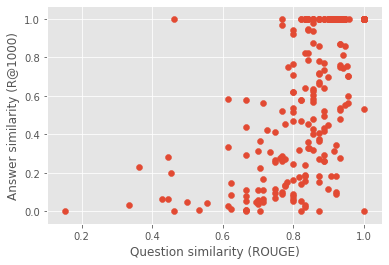

In [19]:
# show correlation between ROUGE and R@k
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%matplotlib inline
matplotlib.style.use('ggplot')

rouge = list(qr_df.rouge)
r_1000 = list(qr_df.r_1000)

plt.scatter(rouge, r_1000)
plt.xlabel("Question similarity (ROUGE)")
plt.ylabel("Answer similarity (R@1000)")
# plt.show()
print(pearsonr(rouge, r_1000))  # Pearson correlation coefficient and the p-value for testing non-correlation

# plt.savefig("rouge_recall.svg")
# files.download("rouge_recall.svg")

# correlation between question similarity and answer similarity
# measures sensitivity of the QA component: bottom right - similar questions end up with different answers
# and inadequacy of the QR metric: questions do not need to be the same as the ground truth questions to solicit correct answers
# the blank area in the top-left shows that minimal lexical overlap is required though

In [21]:
# sample outliers: (1) bottom right - similar questions end up with different answers (high rouge/low recall)
pd.set_option('display.max_colwidth', -1)
rouge_threshold = 0.9
recall_threshold = 0.4
qr_df[(qr_df.r_1000 < recall_threshold) & (qr_df.rouge > rouge_threshold)][['id', 'original', 'query', 'human', 'rouge', 'r_1000']]# for i, row in trec_df.iterrows():

,id,original,query,human,rouge,r_1000
135,45_5,Will I need to put a lot of time into training?,Will I need to put a lot of time into training,Will I need to put a lot of time into training a dog?,0.916667,0.311
177,50_3,What are the important classes of satellite?,What are the important classes of satellite,What are the important classes of artificial satellites?,0.933333,0.276
178,50_4,How do navigation systems work?,How do navigation systems work,How do satellite navigation systems work?,0.909091,0.182
227,55_5,Where is the youngest oceanic found?,Where is the youngest oceanic found,Where is the youngest oceanic crust found?,0.923077,0.098
228,55_6,What about the oldest?,Where is the oldest oceanic found,Where is the oldest oceanic crust found?,0.923077,0.091
373,70_8,How is solar used in architecture?,How is solar used in architecture,How is solar energy used in architecture?,0.923077,0.344
394,72_7,What is Tió de Nadal?,What is Tió de Nadal,What is Tió de Nadal?,1.000000,0.000
433,76_4,What are the most important ones?,What are the most important genres,What are the most important literary genres?,0.923077,0.181


In [24]:
# and (2) top center - questions do not need to be the same as the ground truth questions to solicit the same answers (middle rouge/high recall)
qr_df[(qr_df.r_1000 > 0.8) & (qr_df.rouge < 0.8)][['id', 'original', 'query', 'human', 'rouge', 'r_1000']]# for i, row in trec_df.iterrows():

,id,original,query,human,rouge,r_1000
14,32_6,What about for great whites?,What's the biggest great whites ever caught,What about for great whites?,0.461538,1.000
128,44_6,What foods cause it?,What foods cause acidic reflux,What foods cause acidic reflux in the morning?,0.769231,0.969
288,62_6,What is its importance?,What is surrealism movement importance,What is the importance of the Surrealism movement?,0.769231,1.000


## Reading comprehension